In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import PIL.Image as Image
import os 
import pathlib 
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [3]:
path = r"C:/Users/jaikr/.keras/datasets/flower_photos"
path

'C:/Users/jaikr/.keras/datasets/flower_photos'

In [5]:
data_dir = pathlib.Path(path)
data_dir

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos')

In [4]:
for i in data_dir.iterdir():
    print(i)

C:\Users\jaikr\.keras\datasets\flower_photos\daisy
C:\Users\jaikr\.keras\datasets\flower_photos\dandelion
C:\Users\jaikr\.keras\datasets\flower_photos\flower_photos
C:\Users\jaikr\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\jaikr\.keras\datasets\flower_photos\roses
C:\Users\jaikr\.keras\datasets\flower_photos\sunflowers
C:\Users\jaikr\.keras\datasets\flower_photos\tulips


In [6]:
##preparing dataset 
flower_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [8]:
##label encoding 
flowers_label = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4
}

In [9]:
flower_dict["sunflowers"][0]

WindowsPath('C:/Users/jaikr/.keras/datasets/flower_photos/sunflowers/1008566138_6927679c8a.jpg')

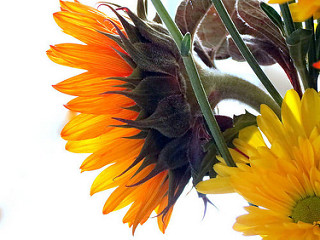

In [11]:
Image.open(flower_dict["sunflowers"][100])

In [12]:
no_of_classes = len(flower_dict.items())
no_of_classes

5

In [13]:
x , y = [], []
for key , value in flower_dict.items():
    for item in value:
        img = cv2.imread(str(item))
        reduced_img = cv2.resize(img,(224,224))
        x.append(reduced_img)
        y.append(flowers_label[key])

In [17]:
x = np.array(x)
y = np.array(y) 
x.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [18]:
x_train , x_test , y_train , y_test = train_test_split(x
                                                       ,y
                                                       ,test_size=0.2,
                                                       random_state=0)

In [19]:
##normalise 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

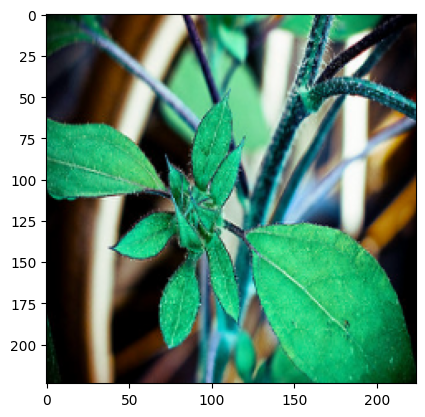

In [23]:
plt.imshow(x_train_scaled[166])
plt.show()

In [ ]:
##cnn archi
#conv-->moxpool-->conv-->maxpool-->conv-->flatten-->dense-->dense

In [ ]:
# callbacks - are functions that are called during the training process
##early stopping -- 
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor='acc',
                              patience=2,#patience is the numbe
                            #   r of
                            #  epochs with no improvement after which training will be stopped
                              restore_best_weights=True

                              )


In [ ]:
model.fit (x_train_scaled , y_train , epochs=5 , callbacks=[earlystopping])

In [ ]:
##cifar-10 dataset --- car , airplane , bird , cat , dog

In [ ]:
#deepcnn architecture